
# Import necessary libraries

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from plotnine import ggplot, aes, geom_point, theme_minimal, labs, scale_x_continuous, scale_y_continuous

# 1. Drawing the map of efficiency

/Users/wyt/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


Text(0.5, 1.0, 'Bank')

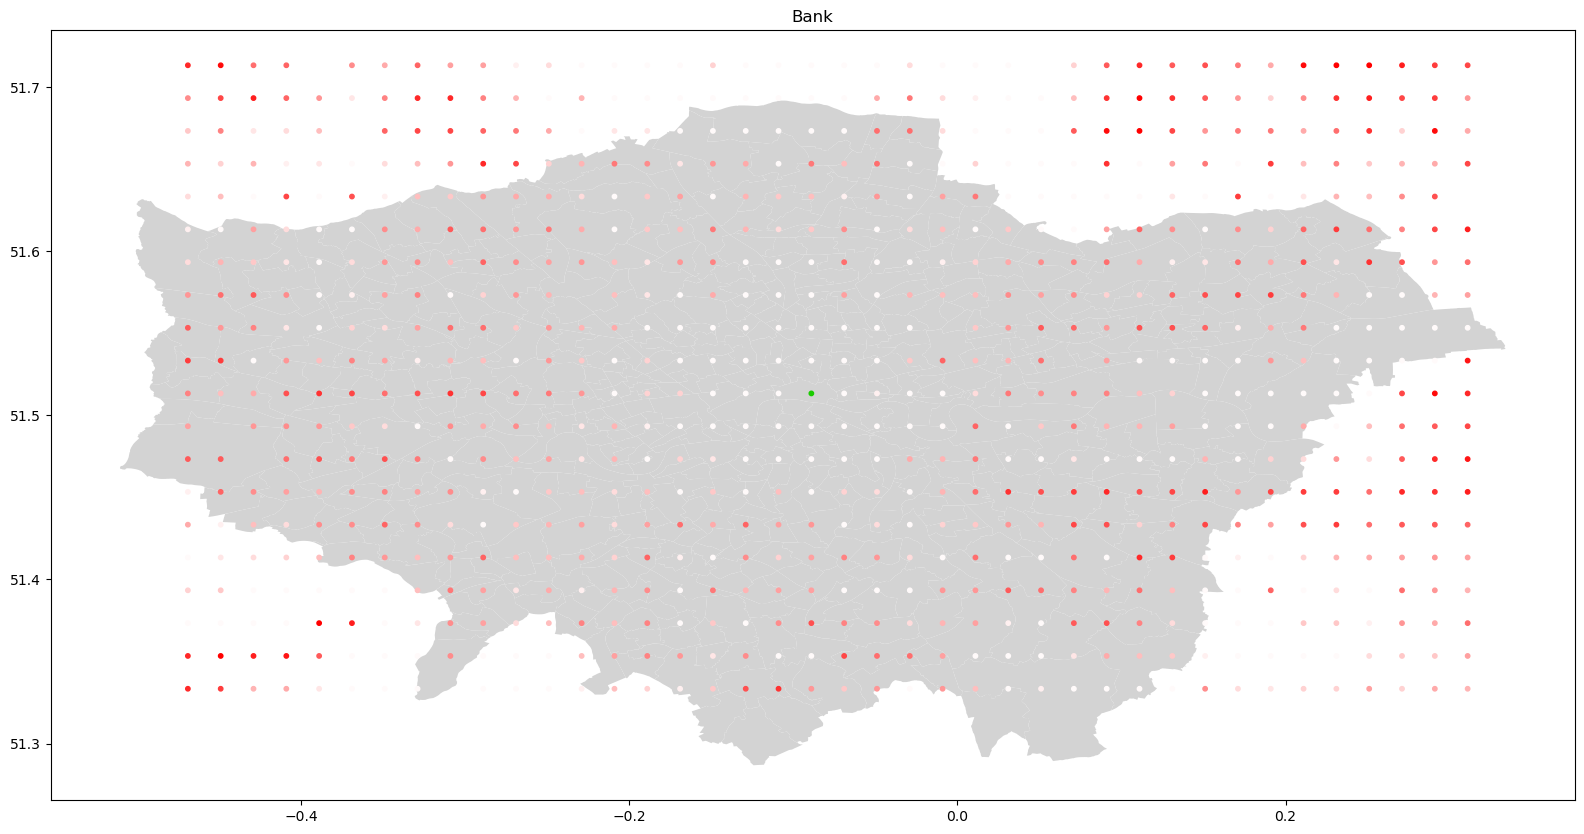

In [2]:
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') # Load the London map shapefile into a GeoDataFrame. This shapefile contains geometries of London wards.
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'}) # Convert the geometry of the London map to the WGS84 latitude-longitude coordinate system (EPSG:4326).

df = pd.read_csv("data/locations.csv", delimiter=',', skiprows=0, low_memory=False) # Load the location data from a CSV file into a pandas DataFrame.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the London map as a base layer with a light grey color for wards.
geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])] # Create Point geometries from the latitude and longitude columns in the DataFrame.
gdf = GeoDataFrame(df, geometry=geometry) # Create a GeoDataFrame from the DataFrame and the geometry list.
gdf['color'] = [tuple(map(float, item.split(','))) for item in df['color']] # Split the 'color' column's string values into RGB float tuples for plotting.

# Overlay the location data on the London map, coloring each point based on the 'color' attribute.
gdf.plot(
    ax = ax,
    markersize=10,
    color = gdf['color']
)

ax.set_title('Bank')

### 1.1 Which places cannot be inputted into the TfL Journey Planner?

/Users/wyt/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


Text(0.5, 1.0, 'Error Points')

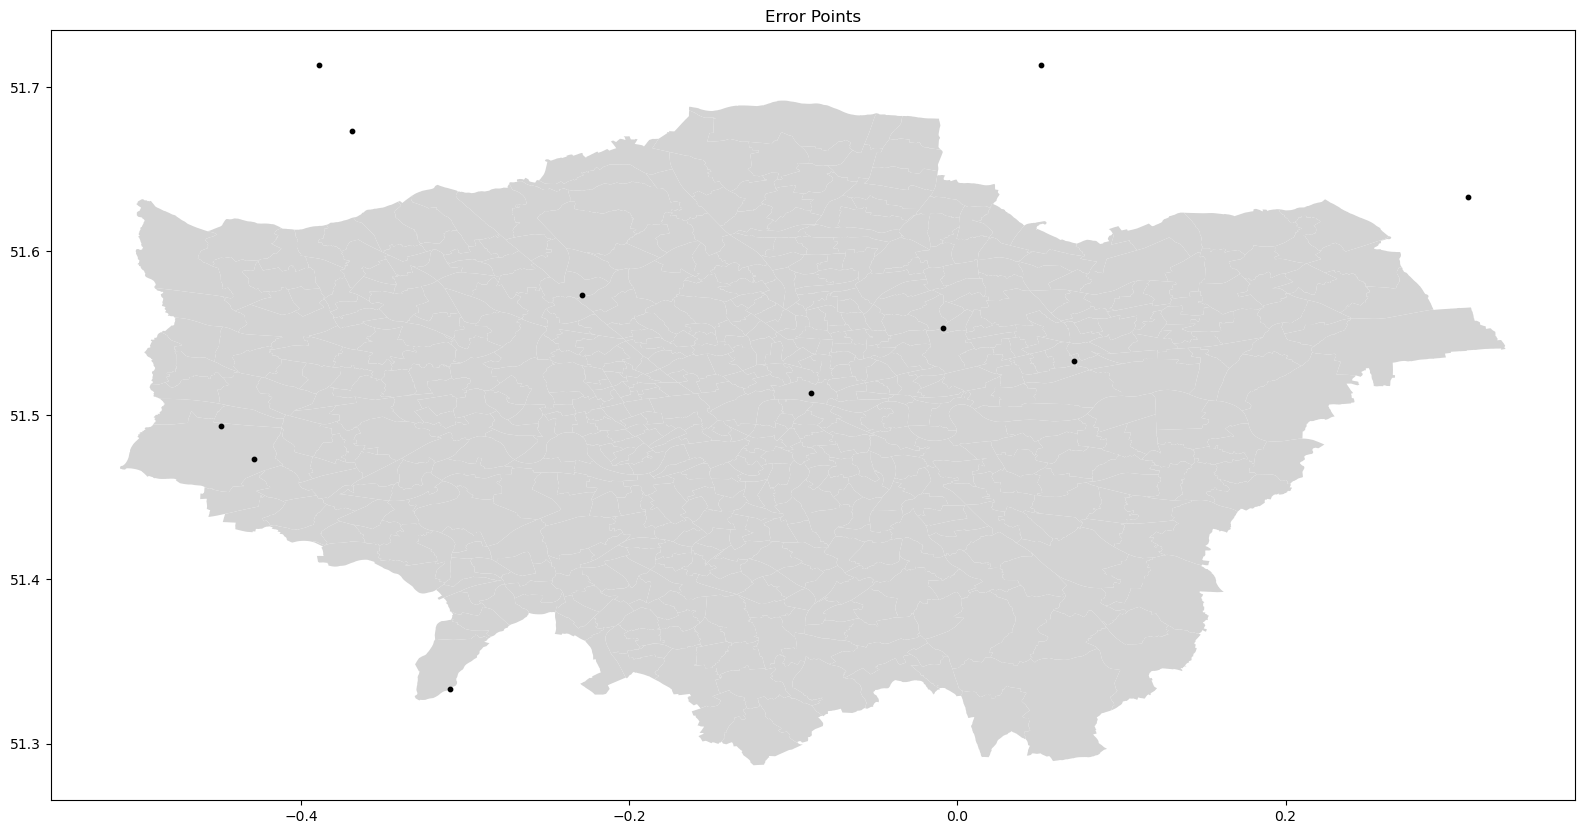

In [3]:
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') # Load the London map shapefile into a GeoDataFrame. This shapefile contains geometries of London wards.
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'}) # Convert the geometry of the London map to the WGS84 latitude-longitude coordinate system (EPSG:4326).

df = pd.read_csv("data/errors.csv", delimiter=',', skiprows=0, low_memory=False) # Load the location data from a CSV file into a pandas DataFrame.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the London map as a base layer with a light grey color for wards.
geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])] # Create Point geometries from the latitude and longitude columns in the DataFrame.
gdf = GeoDataFrame(df, geometry=geometry) # Create a GeoDataFrame from the DataFrame and the geometry list.

# Overlay the location data on the London map, coloring each point based on the 'color' attribute.
gdf.plot(
    ax = ax,
    markersize=10,
    color = 'black'
)

ax.set_title('Error Points')

# 2. Scatter plot of distance and duration

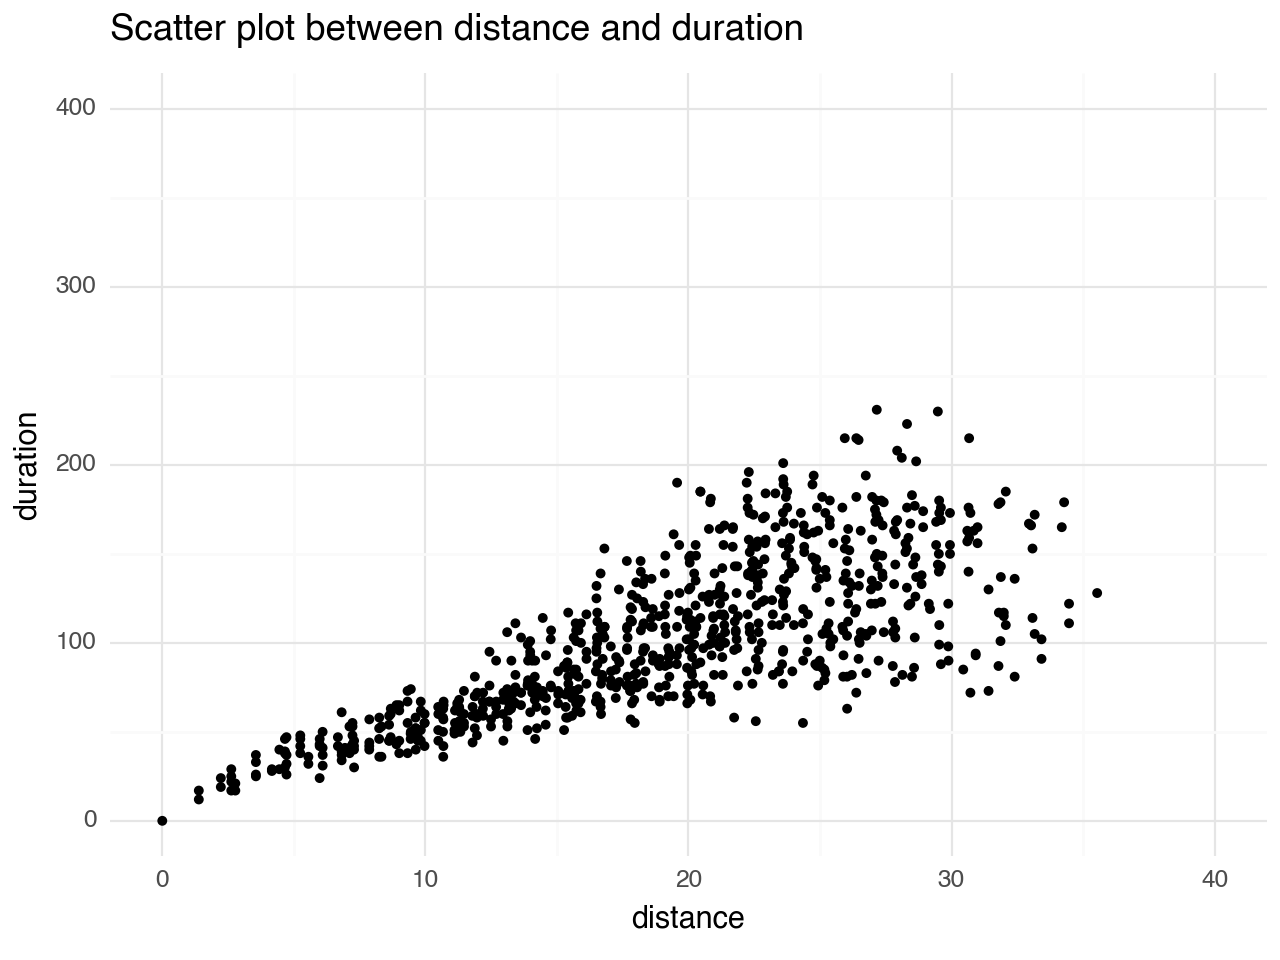

In [4]:
df = pd.read_csv("data/locations.csv", delimiter=',', skiprows=0, low_memory=False) # Load the location data from a CSV file into a pandas DataFrame.

# Create a plot with the data from the DataFrame 'df'. Specify aesthetics (aes), mapping 'distance' to the x-axis and 'duration' to the y-axis.
plot = (
    ggplot(df, aes(x='distance', y='duration')) +
    geom_point(size=1) +
    labs(title="Scatter plot between distance and duration") +
    theme_minimal() +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40], limits=(0, 40)) +
    scale_y_continuous(breaks=[0, 100, 200, 300, 400], limits=(0, 400))
)

print(plot)

# 3. Scatter plot of distance and index

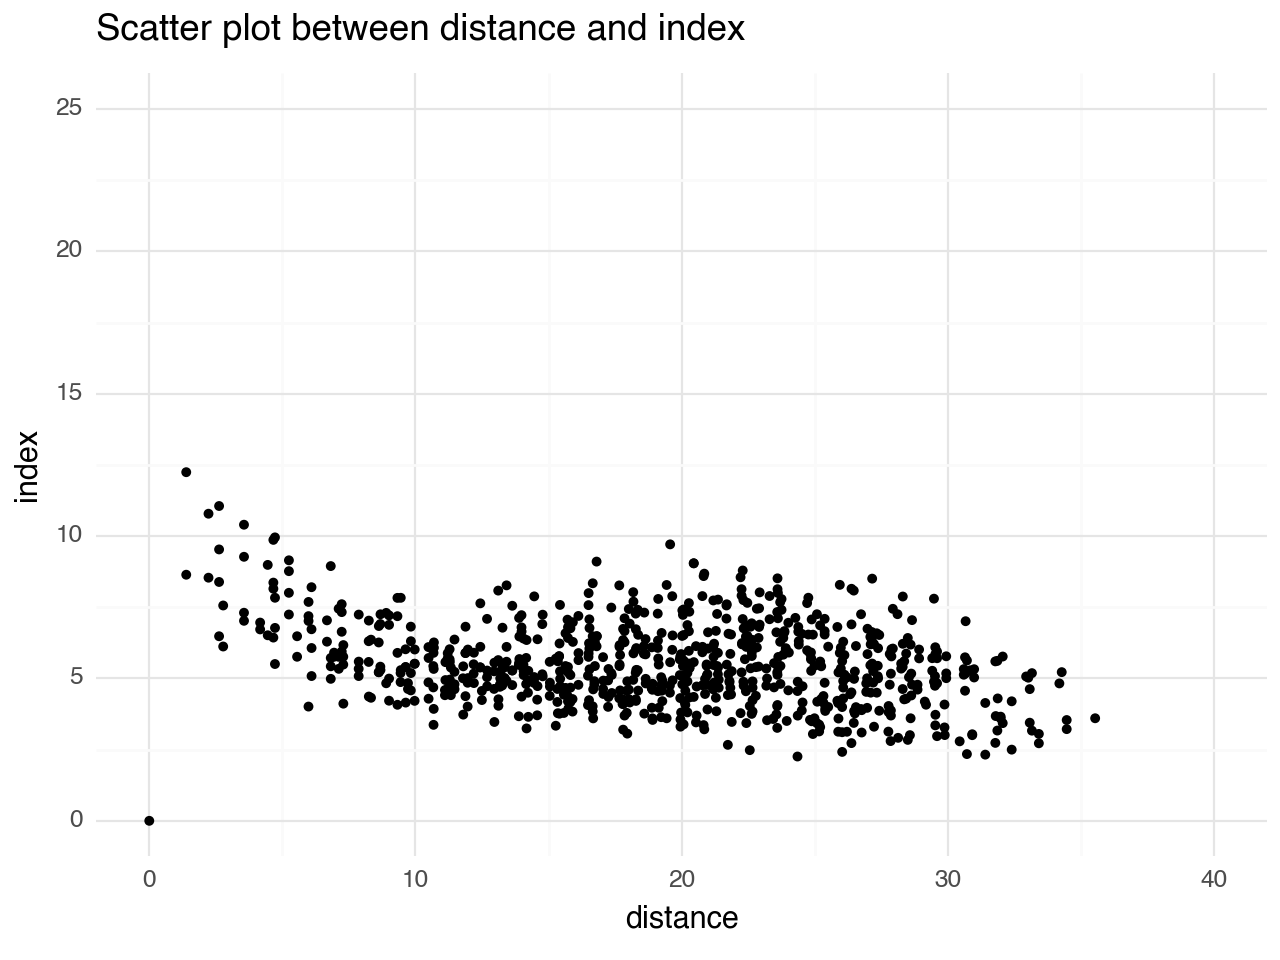

In [5]:
# Create a scatter plot to examine how the 'index' (presumably a measure of efficiency or some other metric) varies with distance.
plot = (
    ggplot(df, aes(x='distance', y='index')) +
    geom_point(size=1) +
    labs(title="Scatter plot between distance and index") +
    theme_minimal() +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40], limits=(0, 40)) +
    scale_y_continuous(breaks=[0, 5, 10, 15, 20, 25], limits=(0, 25))
)

print(plot)

# 4. Drawing the map of time

/Users/wyt/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<Axes: >

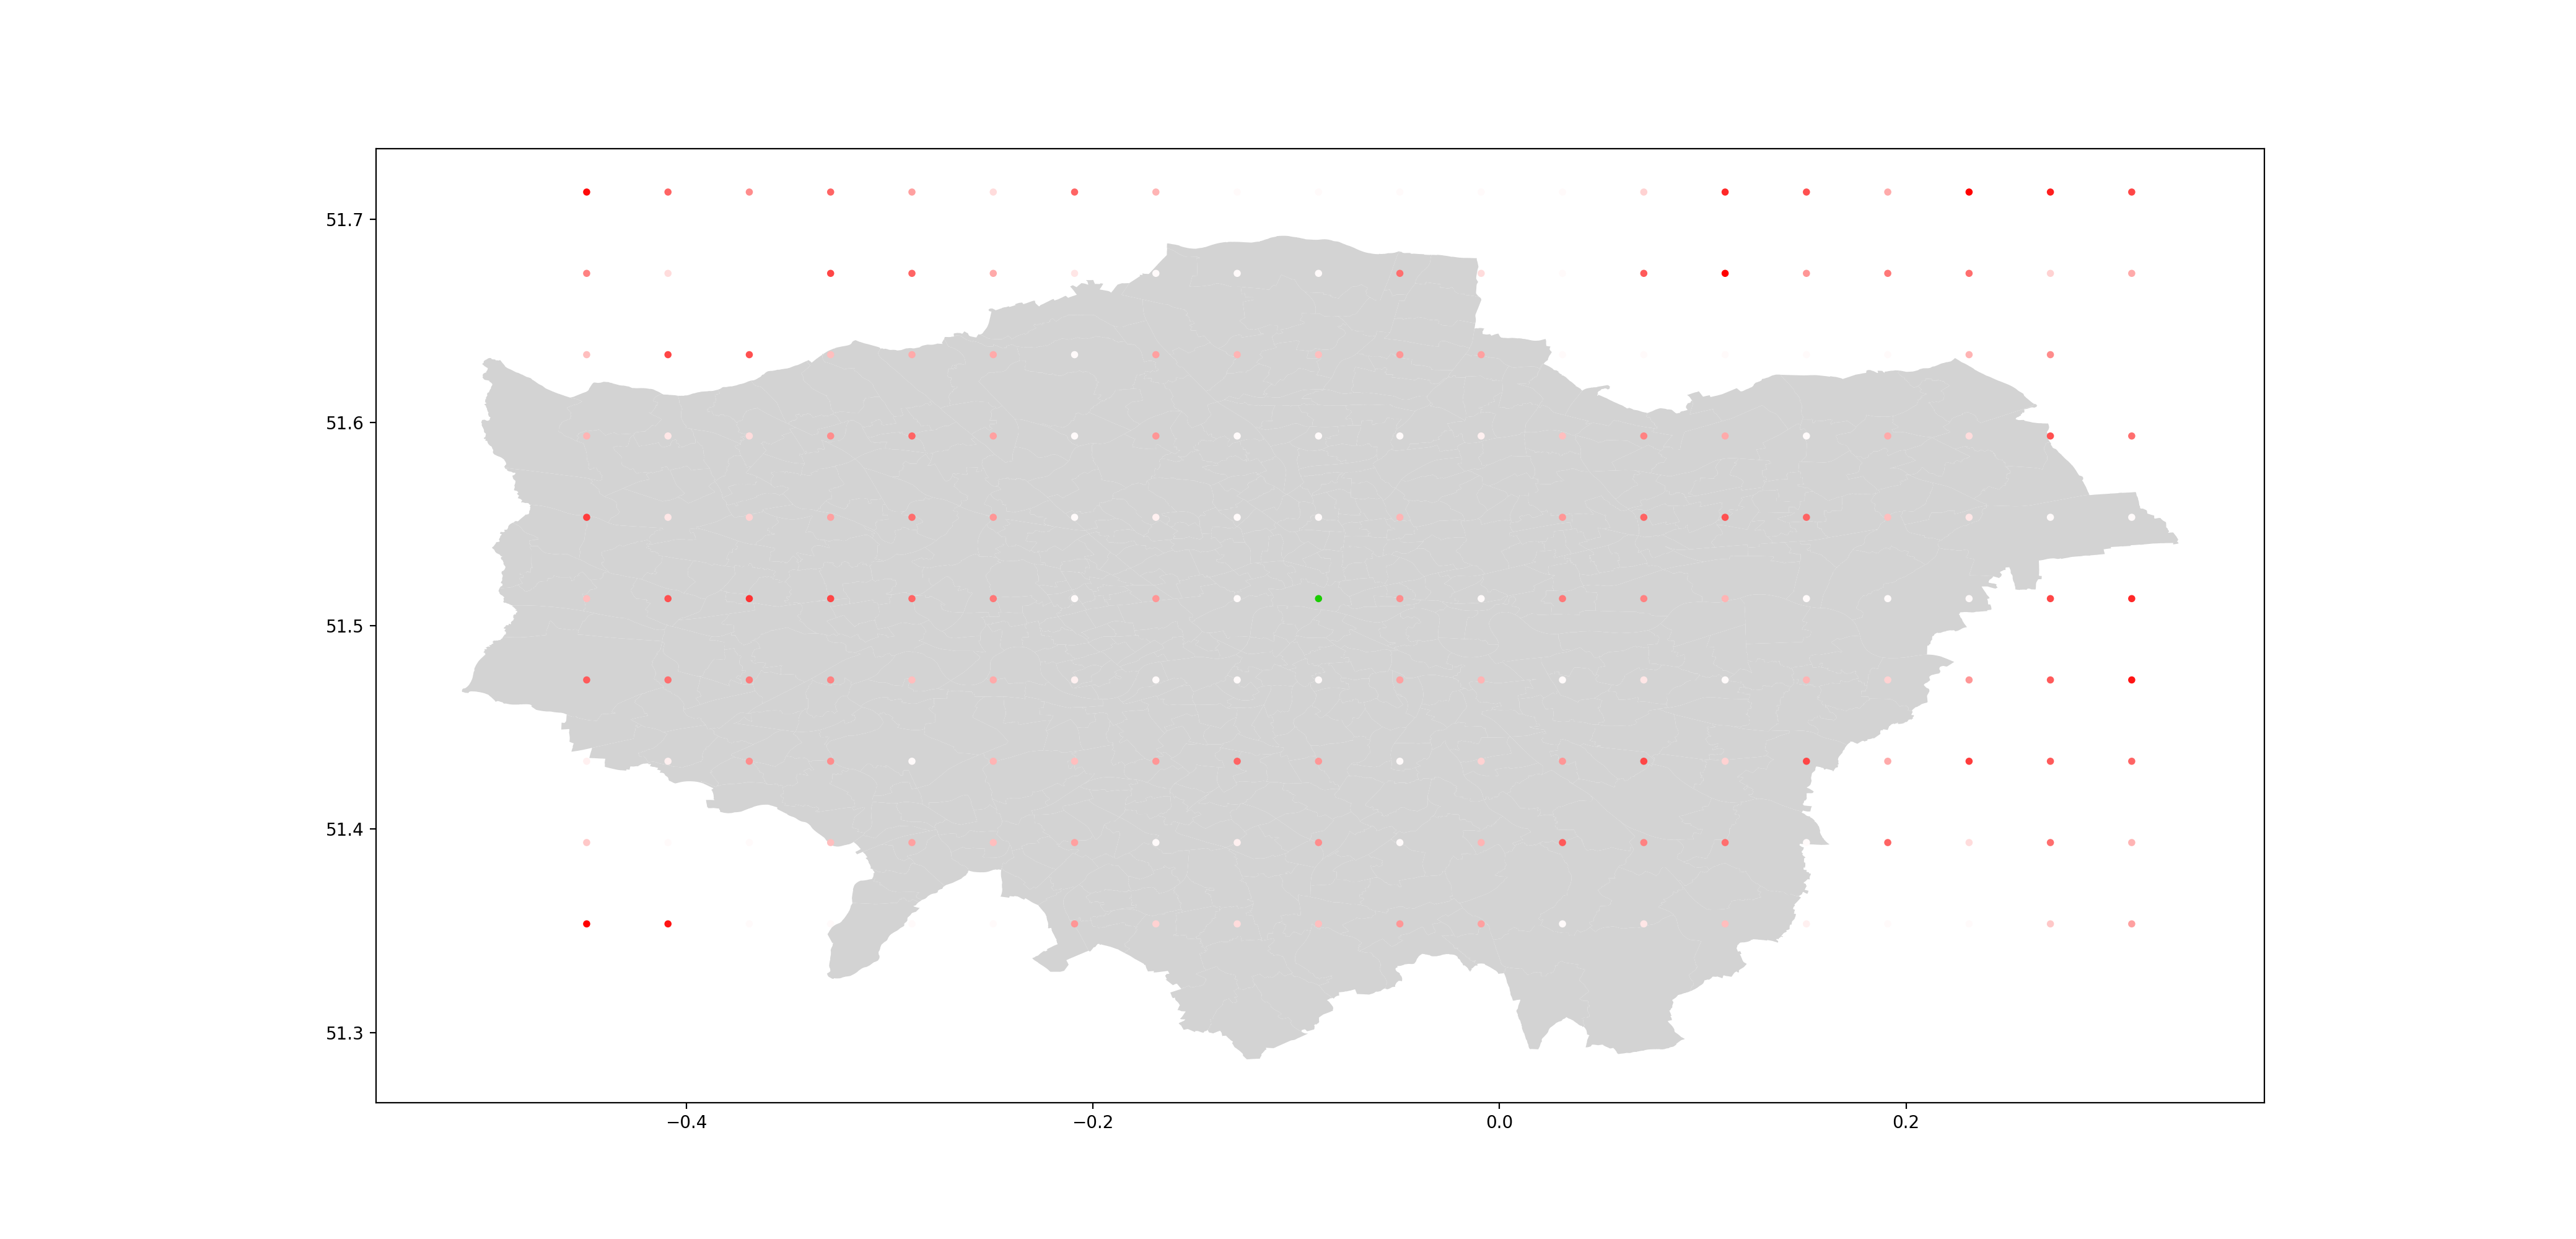

In [6]:
# Read the shapefile containing London's ward boundaries and set its coordinate reference system to WGS84 (EPSG:4326).
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') 
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'})

df = pd.read_csv("data/time_of_day.csv", delimiter=',', skiprows=0, low_memory=False) # Load the 'time_of_day' data from a CSV file into a pandas DataFrame.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the base map of London wards in light grey.

# Create Point geometries from the longitude and latitude columns in the DataFrame.
geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])] 
gdf = GeoDataFrame(df, geometry=geometry)

# Convert the 'color' column values from strings to tuples of floats to use as colors in the plot.
gdf['color'] = [tuple(map(float, item.split(','))) for item in df['color']]

# Overlay the points on the base map, using the 'color' column to color each point.
gdf.plot(
    ax = ax,
    markersize=10,
    color = gdf['color']
)

# 5. Tube Analysis

/Users/wyt/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


Text(0.5, 1.0, 'Tube only')

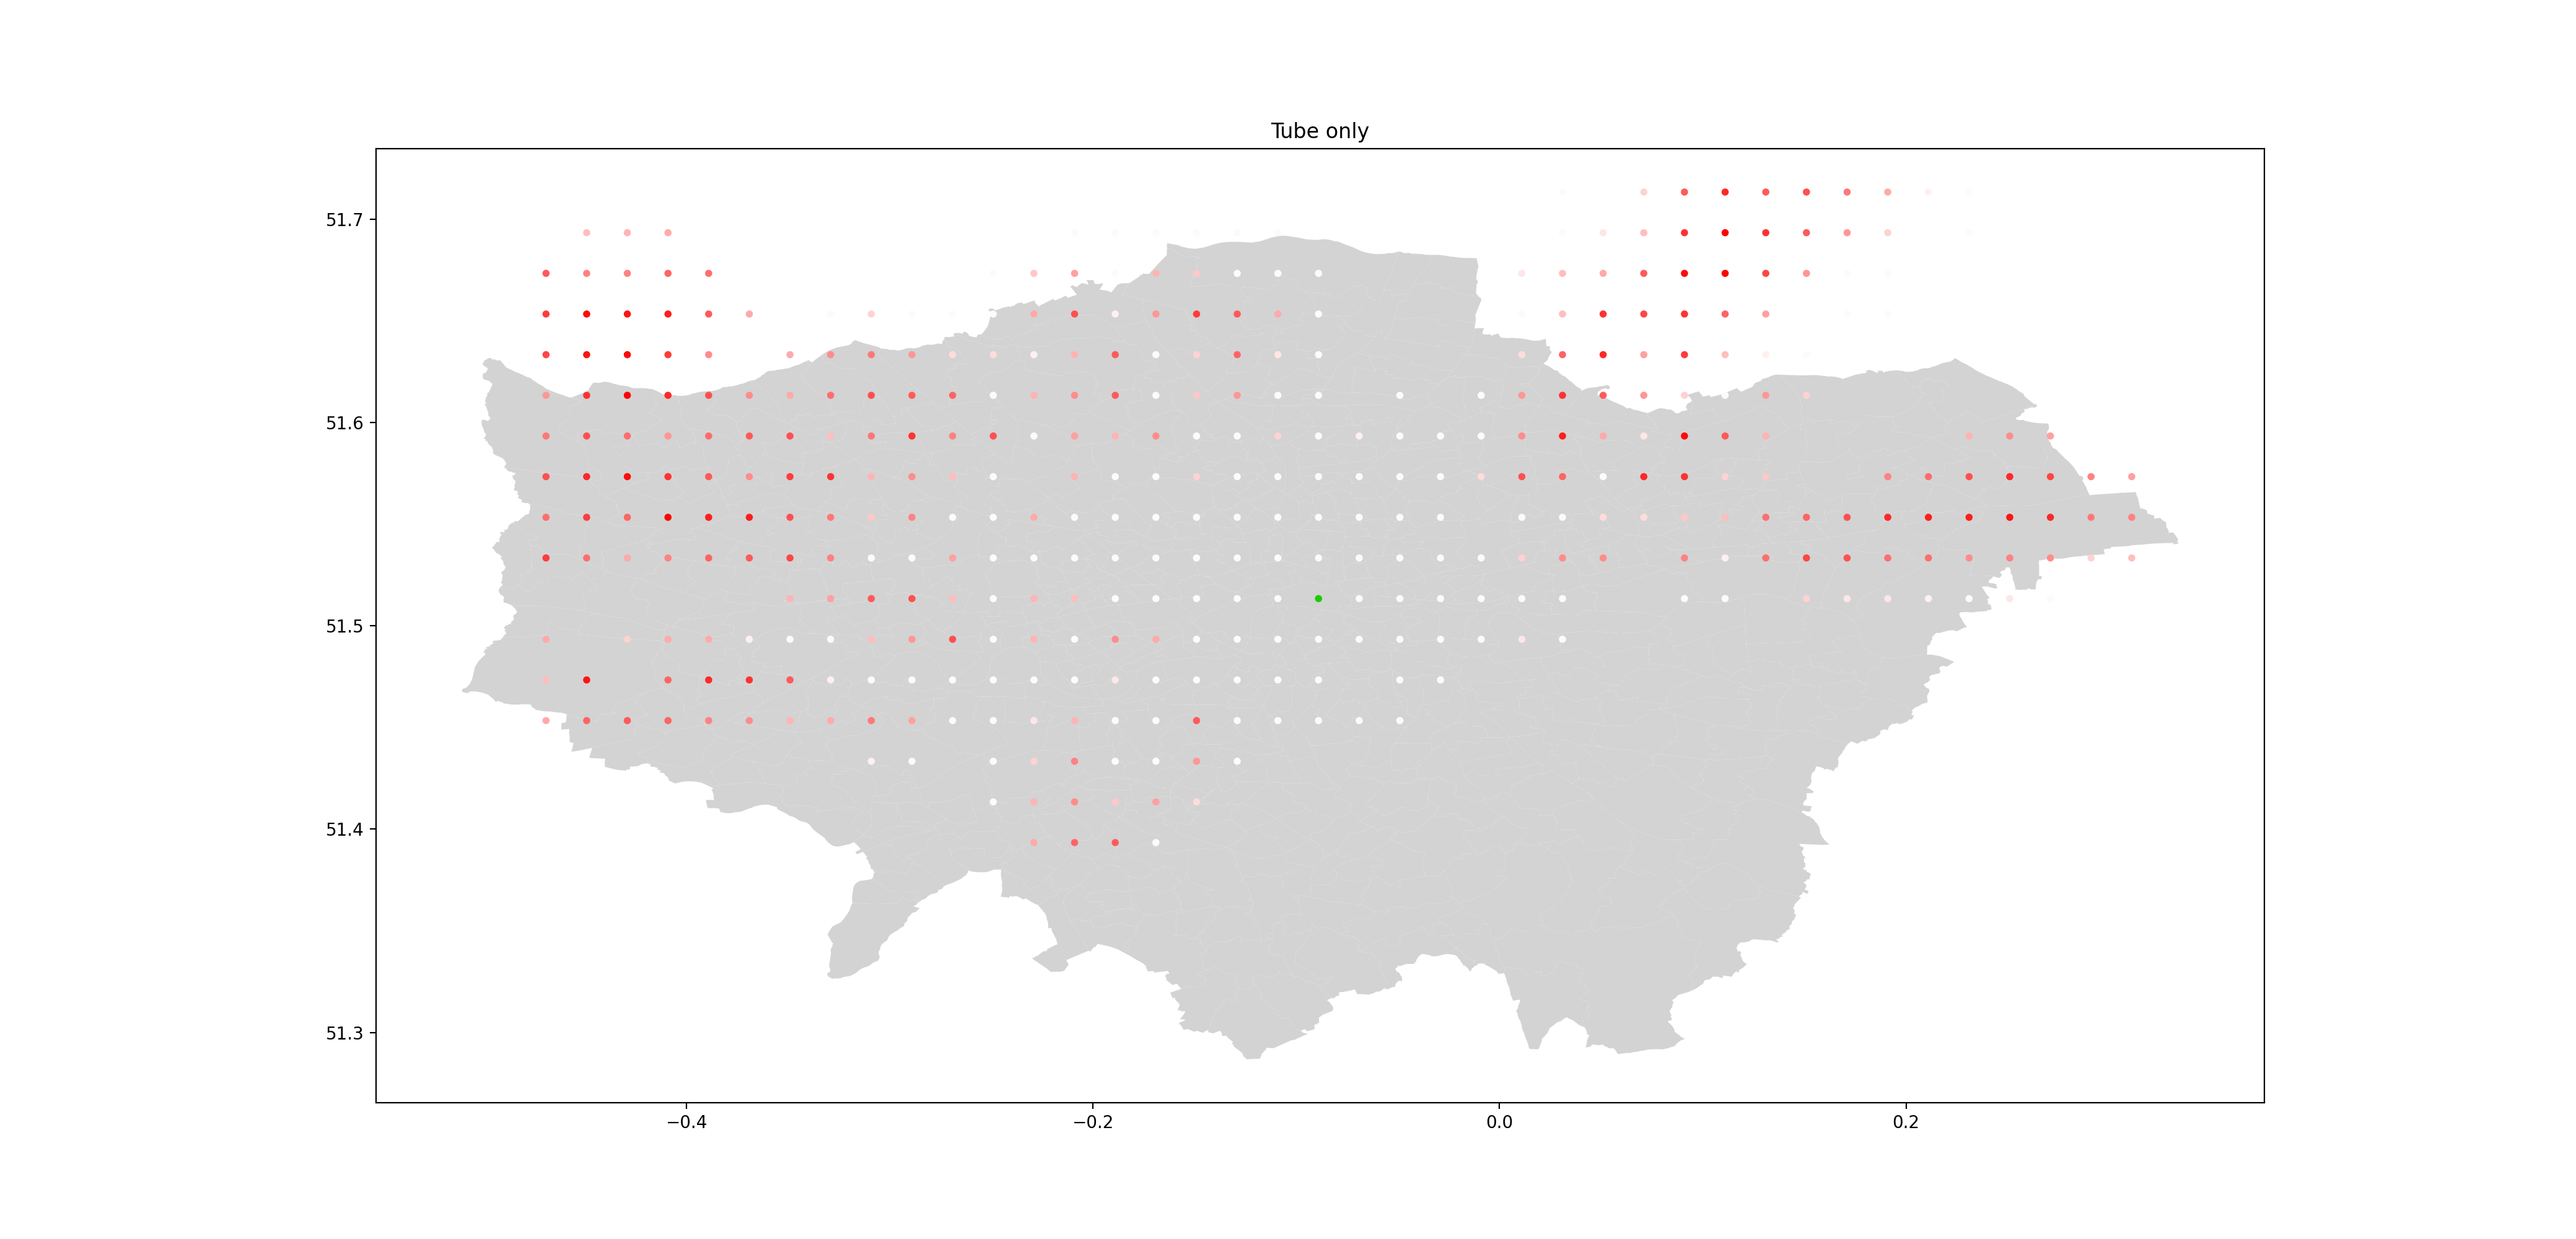

In [7]:
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') # Load London's ward boundaries as a GeoDataFrame from a shapefile.
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'}) # Update the coordinate reference system of the GeoDataFrame to WGS84 (EPSG:4326) for geographical coordinates (latitude and longitude).

df = pd.read_csv("data/tube.csv", delimiter=',', skiprows=0, low_memory=False) # Read the tube travel data from a CSV file into a pandas DataFrame.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the base map of London using the ward boundaries. The map is colored light grey for the background.

# Convert the latitude and longitude columns from the DataFrame into Point geometries for plotting.
geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])]
gdf = GeoDataFrame(df, geometry=geometry) # Create a GeoDataFrame that combines the tube data with the corresponding Point geometries.

gdf['color'] = [tuple(map(float, item.split(','))) for item in df['color']] # Convert the string representations in the 'color' column to tuples of floats.

# Overlay the tube journey data points on the base map of London.
gdf.plot(
    ax = ax,
    markersize=10,
    color = gdf['color']
)

ax.set_title('Tube only')

### 5.1 Scatter plot of distance and duration for tubes

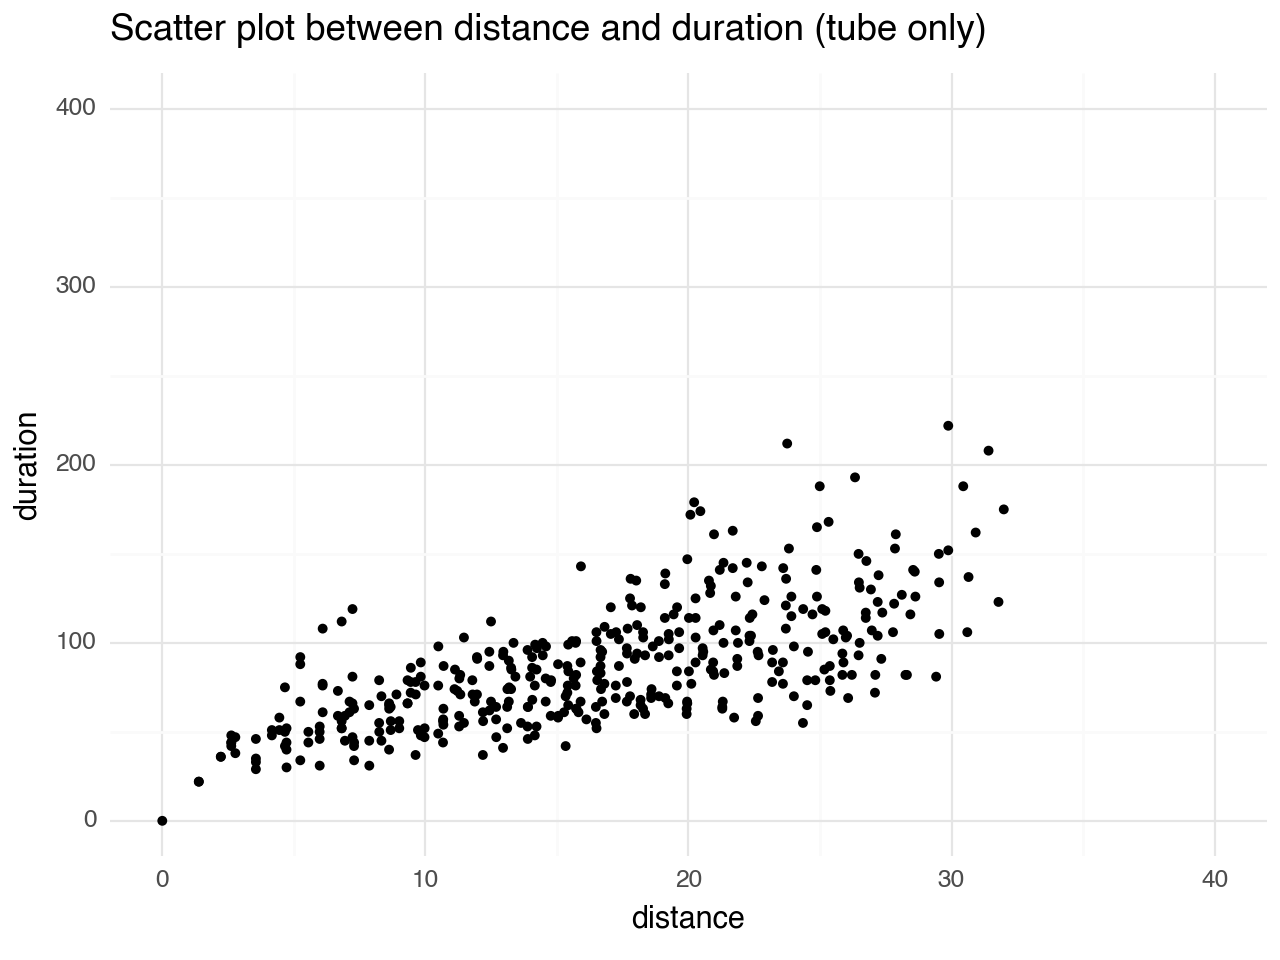

In [8]:
# Construct the scatter plot with data from the DataFrame 'df'.
plot = (
    ggplot(df, aes(x='distance', y='duration')) +
    geom_point(size=1) +
    labs(title="Scatter plot between distance and duration (tube only)") +
    theme_minimal() +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40], limits=(0, 40)) +
    scale_y_continuous(breaks=[0, 100, 200, 300, 400], limits=(0, 400))
)

print(plot)

### 5.2. Scatter plot of duration and index of tubes

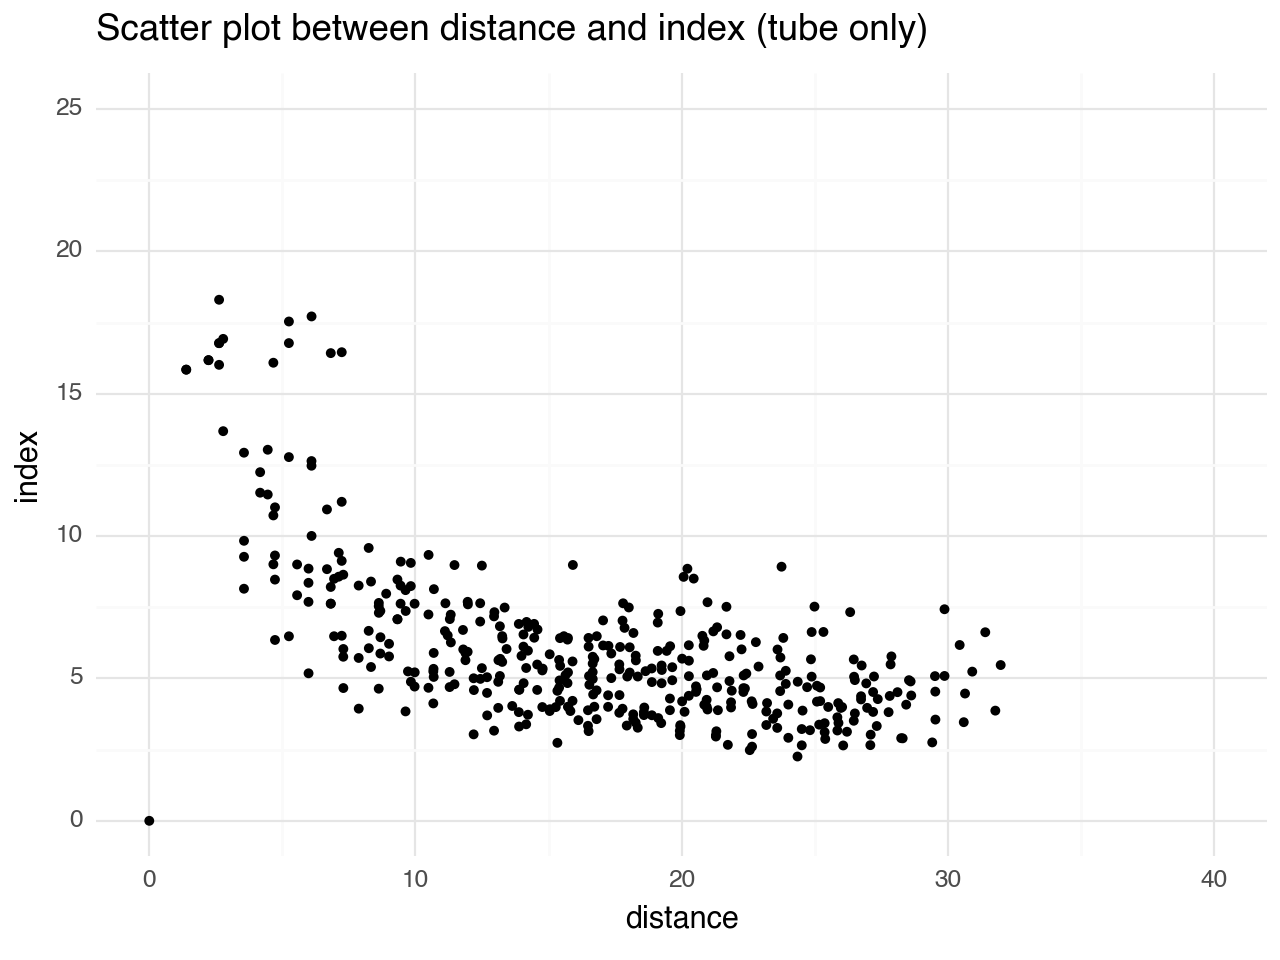

In [9]:
# Create the scatter plot with the DataFrame 'df', mapping 'distance' to the x-axis and 'index' to the y-axis.
plot = (
    ggplot(df, aes(x='distance', y='index')) +
    geom_point(size=1) +
    labs(title="Scatter plot between distance and index (tube only)") +
    theme_minimal() +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40], limits=(0, 40)) +
    scale_y_continuous(breaks=[0, 5, 10, 15, 20, 25], limits=(0, 25))
)

print(plot)

# 6. Bus Analysis

/Users/wyt/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


Text(0.5, 1.0, 'Bus only')

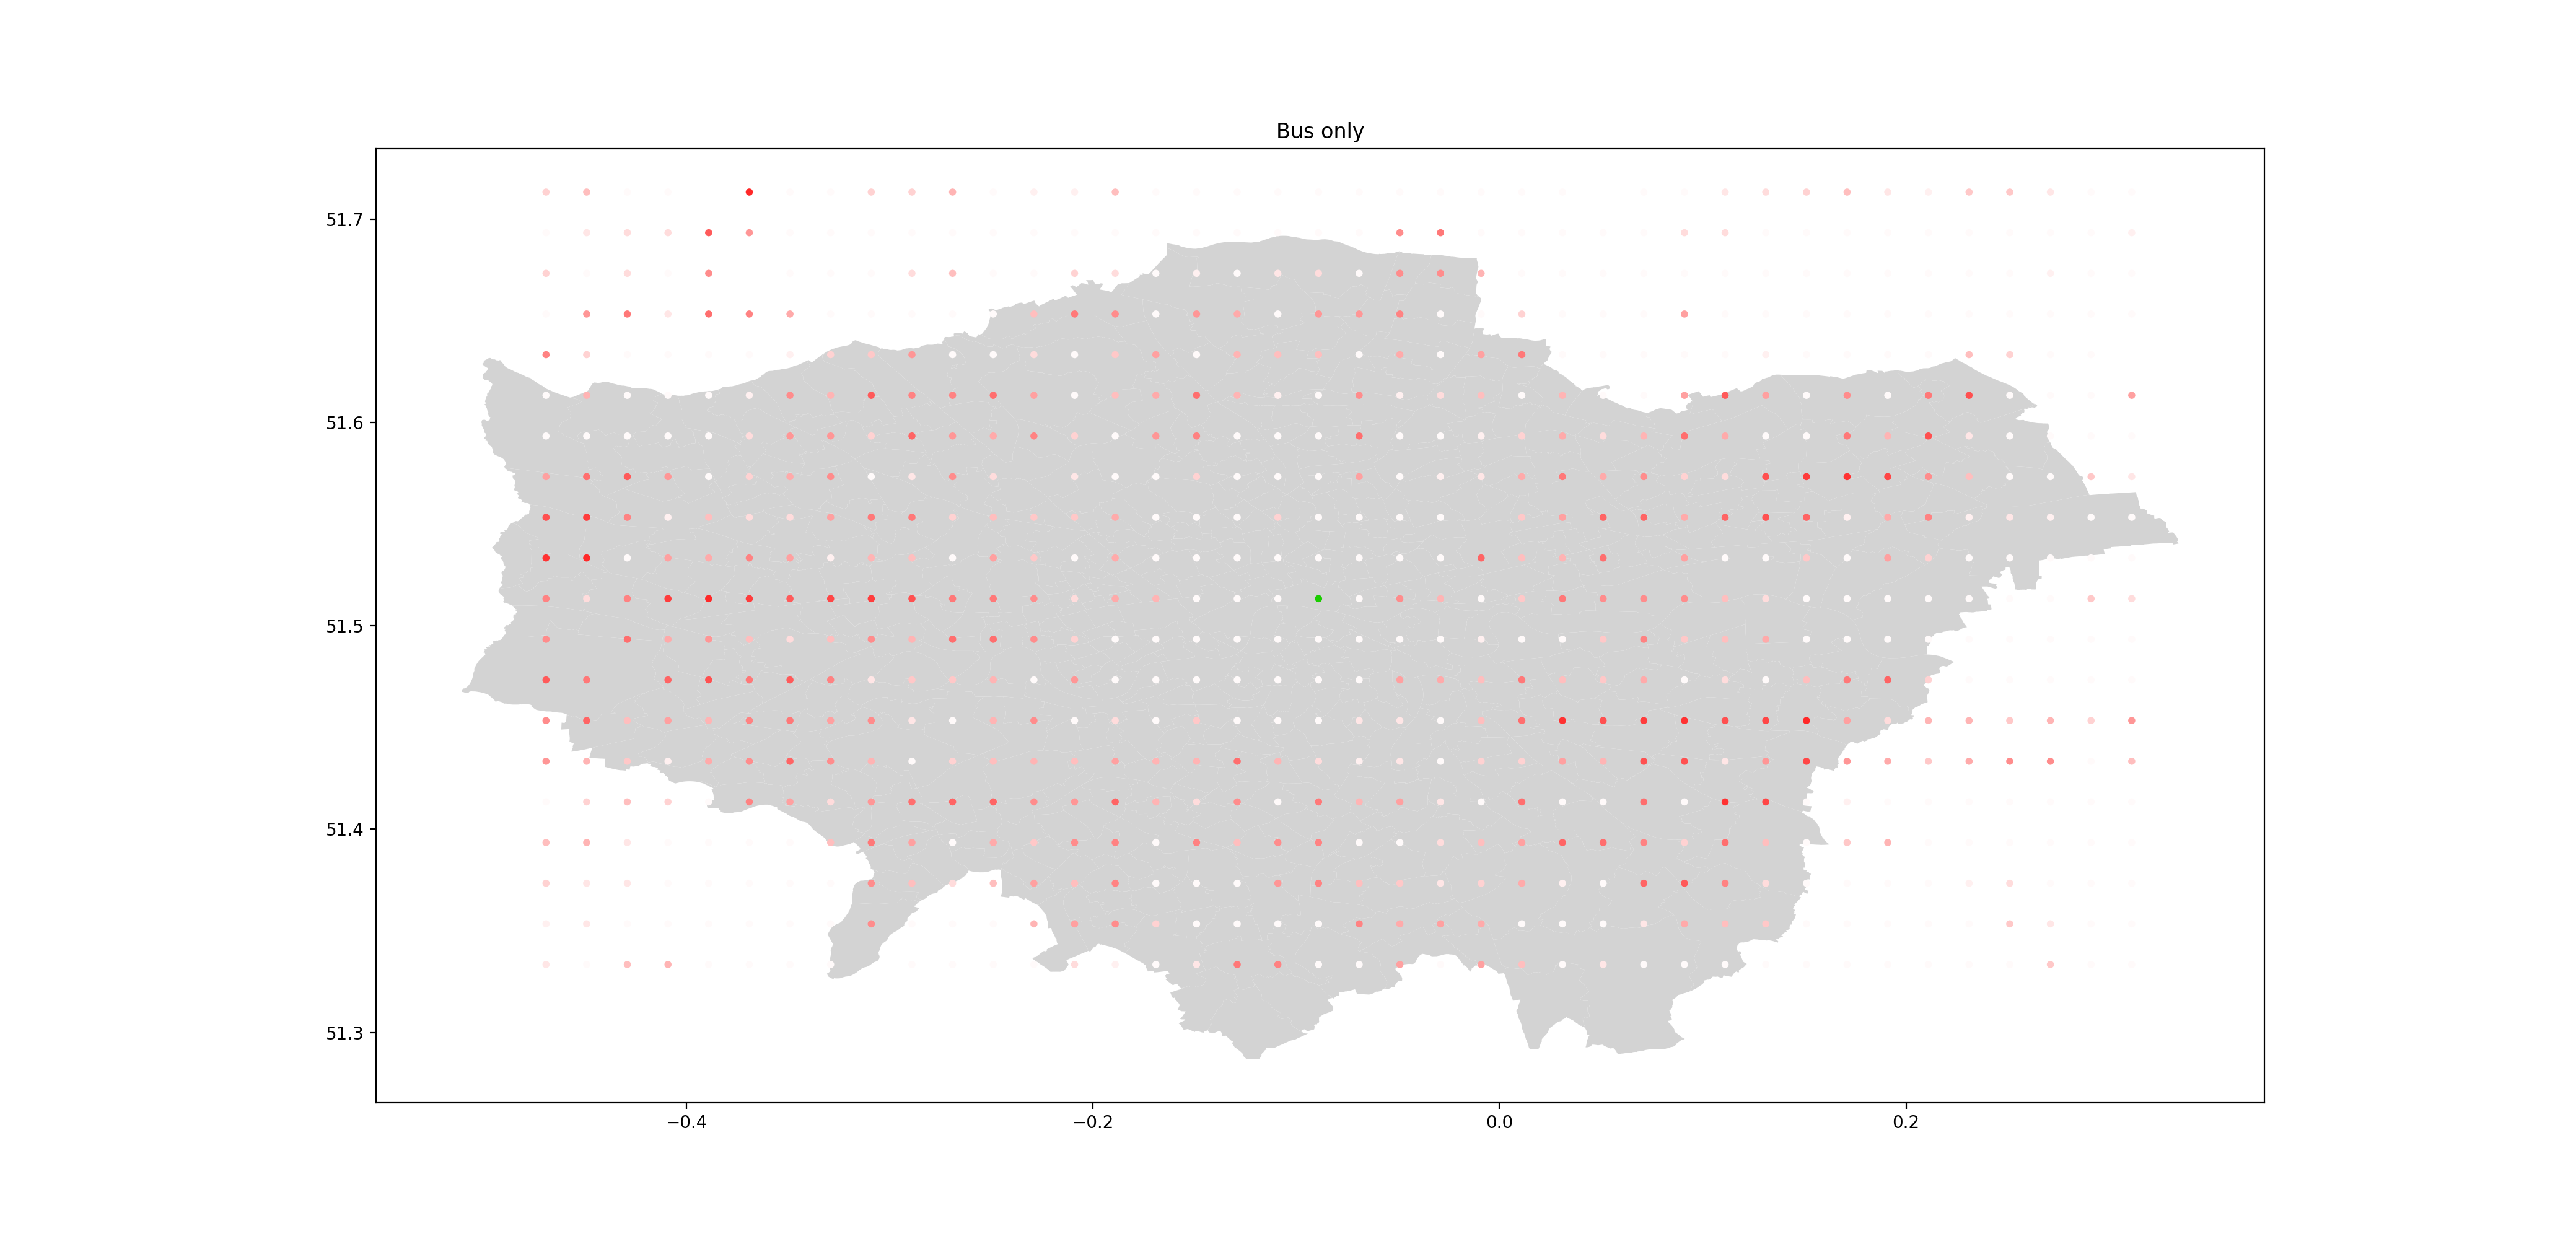

In [10]:
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') # Load the geographical data of London's wards from a shapefile.
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'}) # Convert the geometries in the GeoDataFrame to the WGS84 coordinate reference system for GPS compatibility.

df = pd.read_csv("data/buses.csv", delimiter=',', skiprows=0, low_memory=False) # Reload the bus data from the previously saved CSV file into a new DataFrame.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the base map of London using a light grey color for the wards.

geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])] # Create Point geometries from the latitude and longitude columns for plotting.
gdf = GeoDataFrame(df, geometry=geometry) # Combine the DataFrame with these geometries into a GeoDataFrame for spatial plotting.

# Convert color column strings to RGB float tuples for visualization.
gdf['color'] = [tuple(map(float, item.split(','))) for item in df['color']]

# Overlay the bus data on the map, using the specified colors.
gdf.plot(
    ax = ax,
    markersize=10,
    color = gdf['color']
)

ax.set_title('Bus only')

### 6.1. Scatter plot of distance and duration for bus

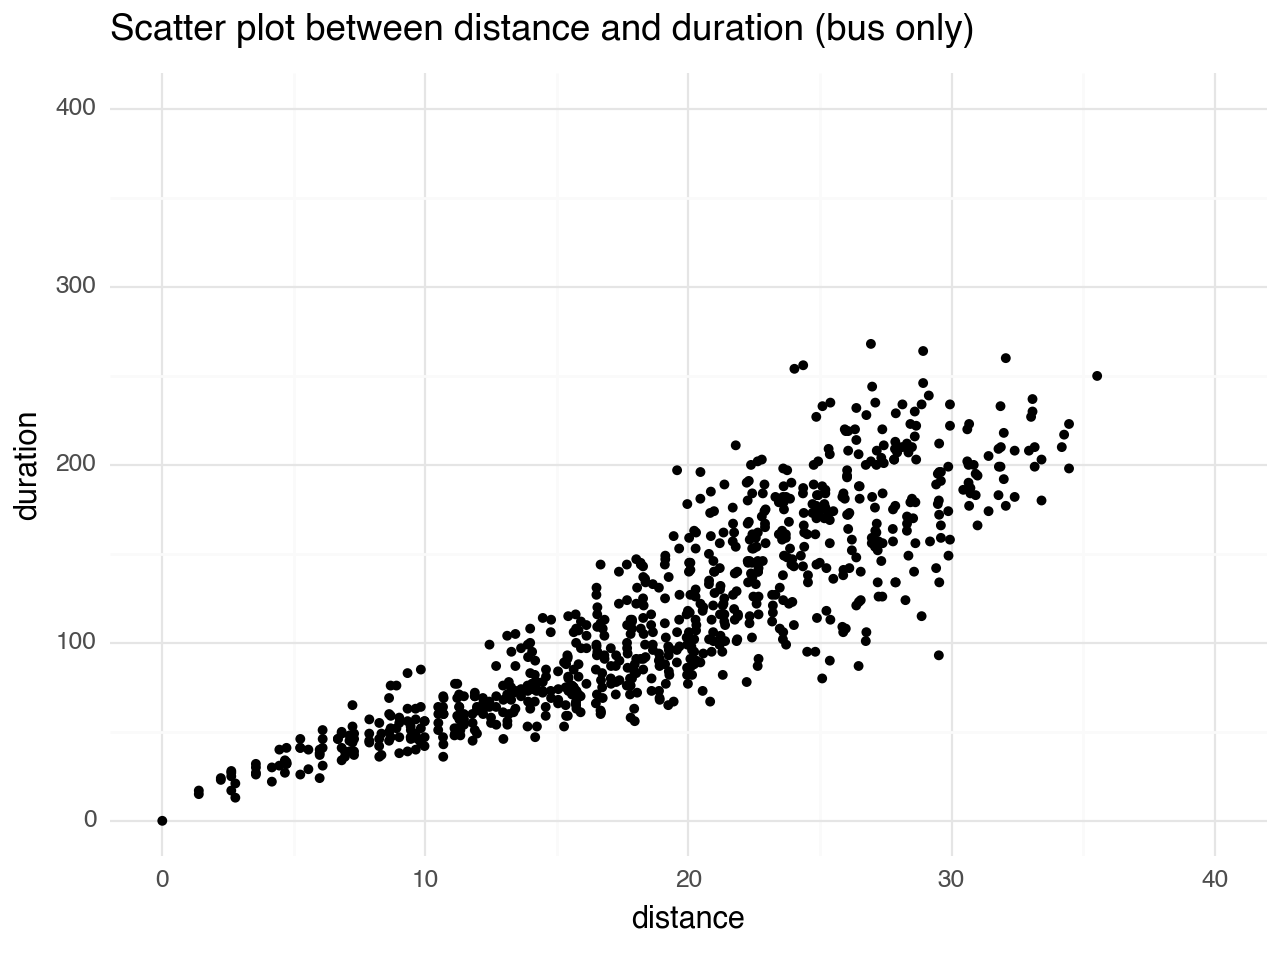

In [11]:
# Create a scatter plot of distance against duration for bus journeys.
plot = (
    ggplot(df, aes(x='distance', y='duration')) +
    geom_point(size=1) +
    labs(title="Scatter plot between distance and duration (bus only)") +
    theme_minimal() +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40], limits=(0, 40)) +
    scale_y_continuous(breaks=[0, 100, 200, 300, 400], limits=(0, 400))
)

print(plot)

### 6.2. Scatter plot of distance and index for bus

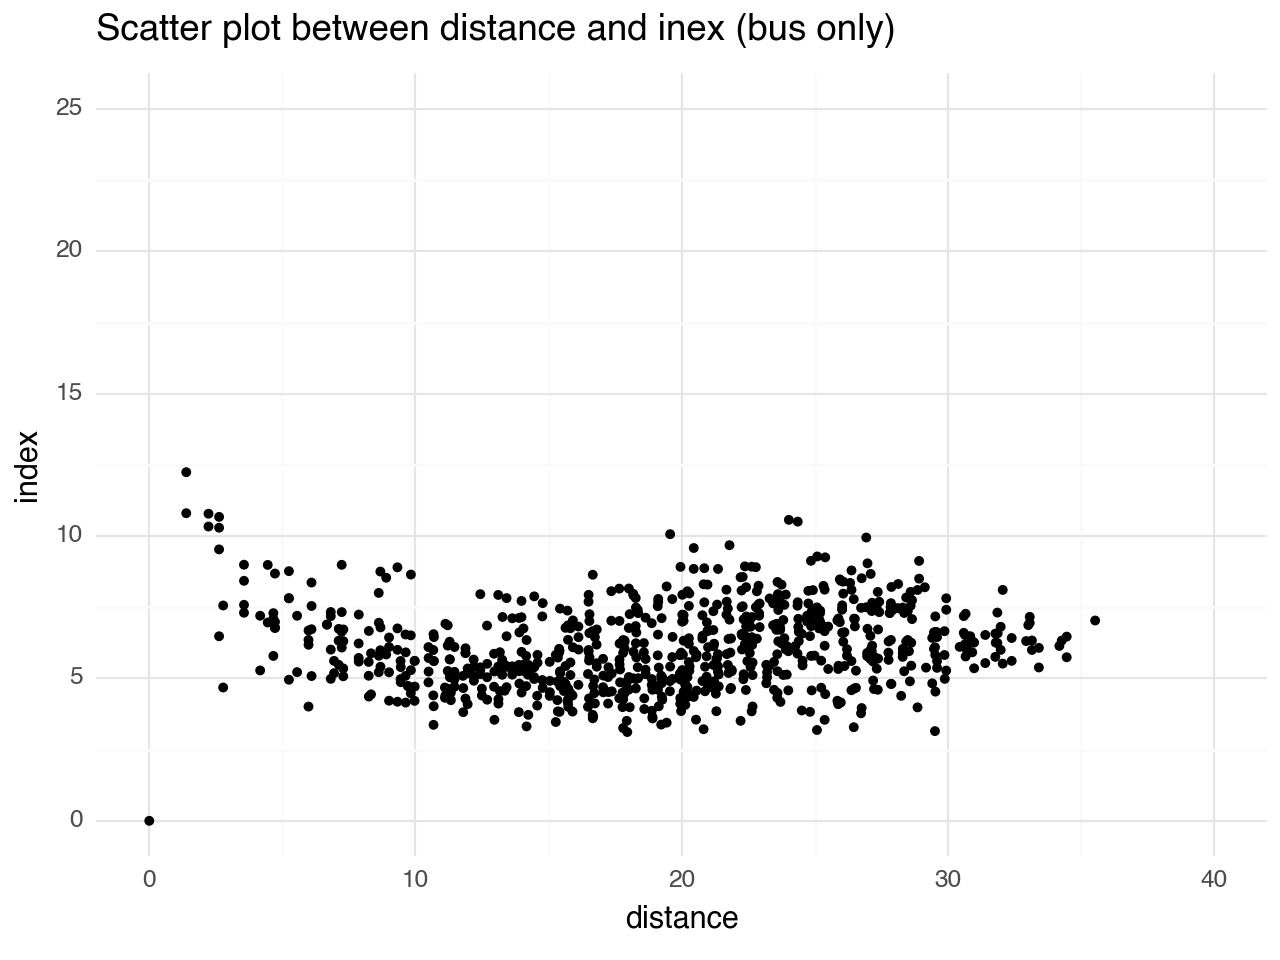

In [12]:
# Create a scatter plot of distance against the efficiency index for bus journeys.
plot = (
    ggplot(df, aes(x='distance', y='index')) +
    geom_point(size=1) +
    labs(title="Scatter plot between distance and inex (bus only)") +
    theme_minimal() +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40], limits=(0, 40)) +
    scale_y_continuous(breaks=[0, 5, 10, 15, 20, 25], limits=(0, 25))
)

print(plot)

# 7. Map of traffic

Text(0.5, 1.0, 'Station Traffic')

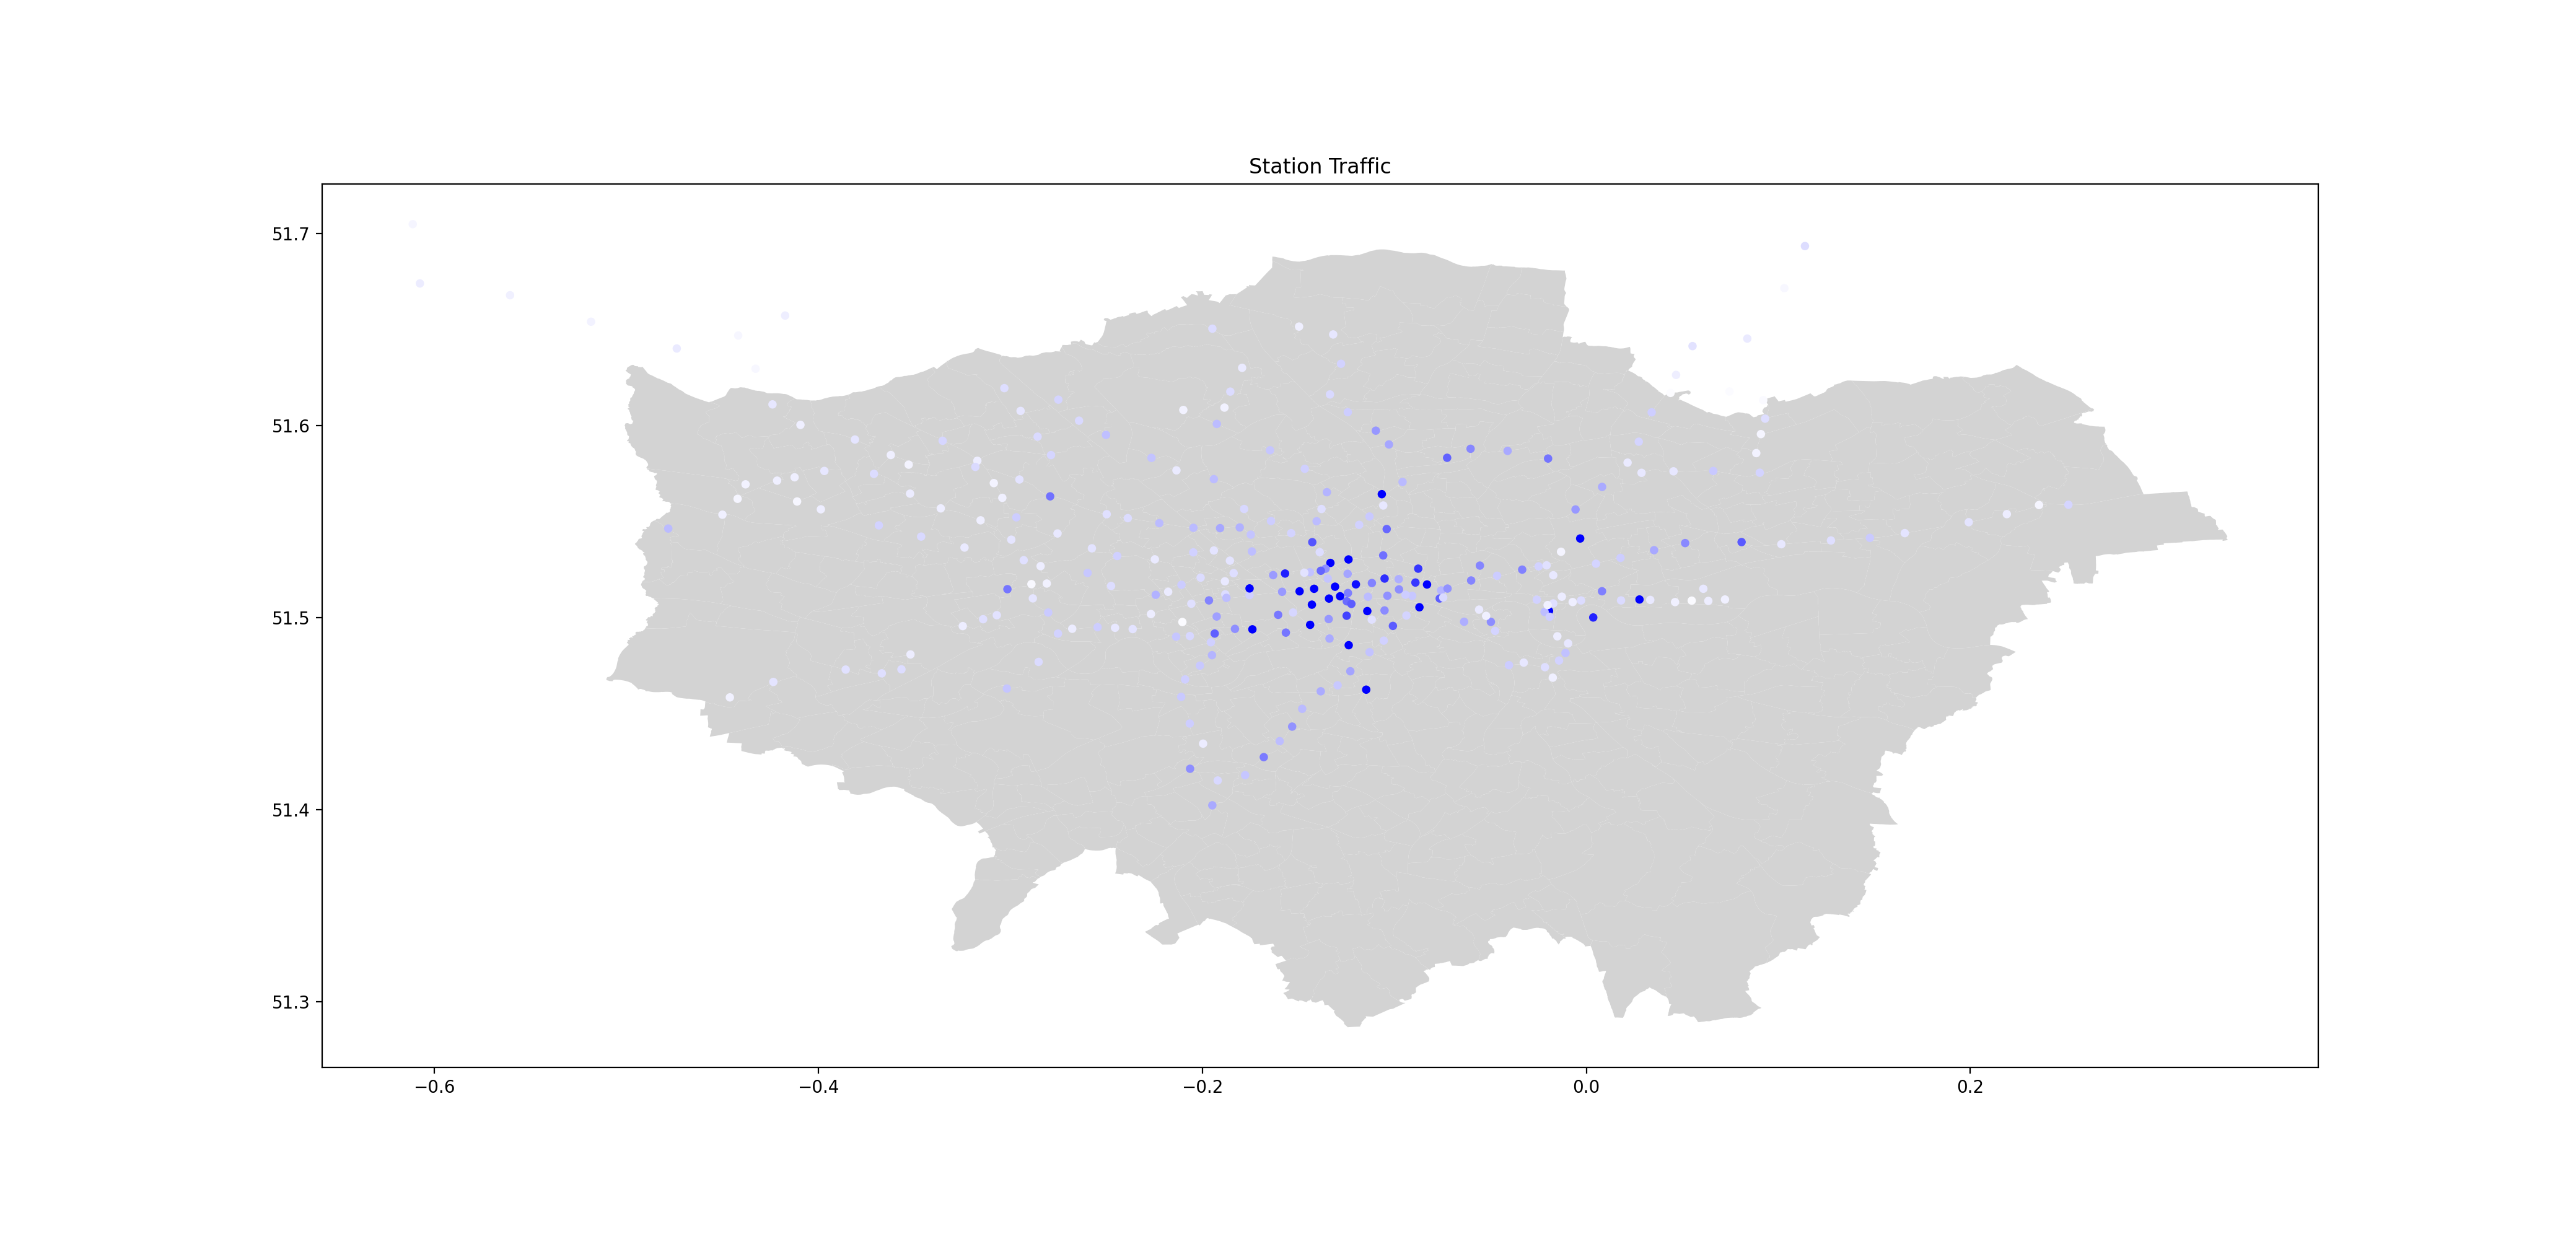

In [13]:
# Load the merged station traffic data.
df = pd.read_csv("data/station_traffic_merged.csv", delimiter=',', skiprows=0, low_memory=False)

ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the base map of London wards in light grey.
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])] # Create Point geometries from the station coordinates.
gdf = GeoDataFrame(df, geometry=geometry) # Create a GeoDataFrame from the station data, enabling spatial visualization.
gdf['color'] = [tuple(map(float, item.split(','))) for item in df['Colors']] # Convert the 'Colors' column to RGB tuples for plotting.

# Plot the stations on the map, coloring them based on the traffic data.
gdf.plot(
    ax = ax,
    markersize=15,
    color = gdf['color']
)

ax.set_title('Station Traffic')

/Users/wyt/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


Text(0.5, 1.0, 'Comparing station traffic to the map for bank')

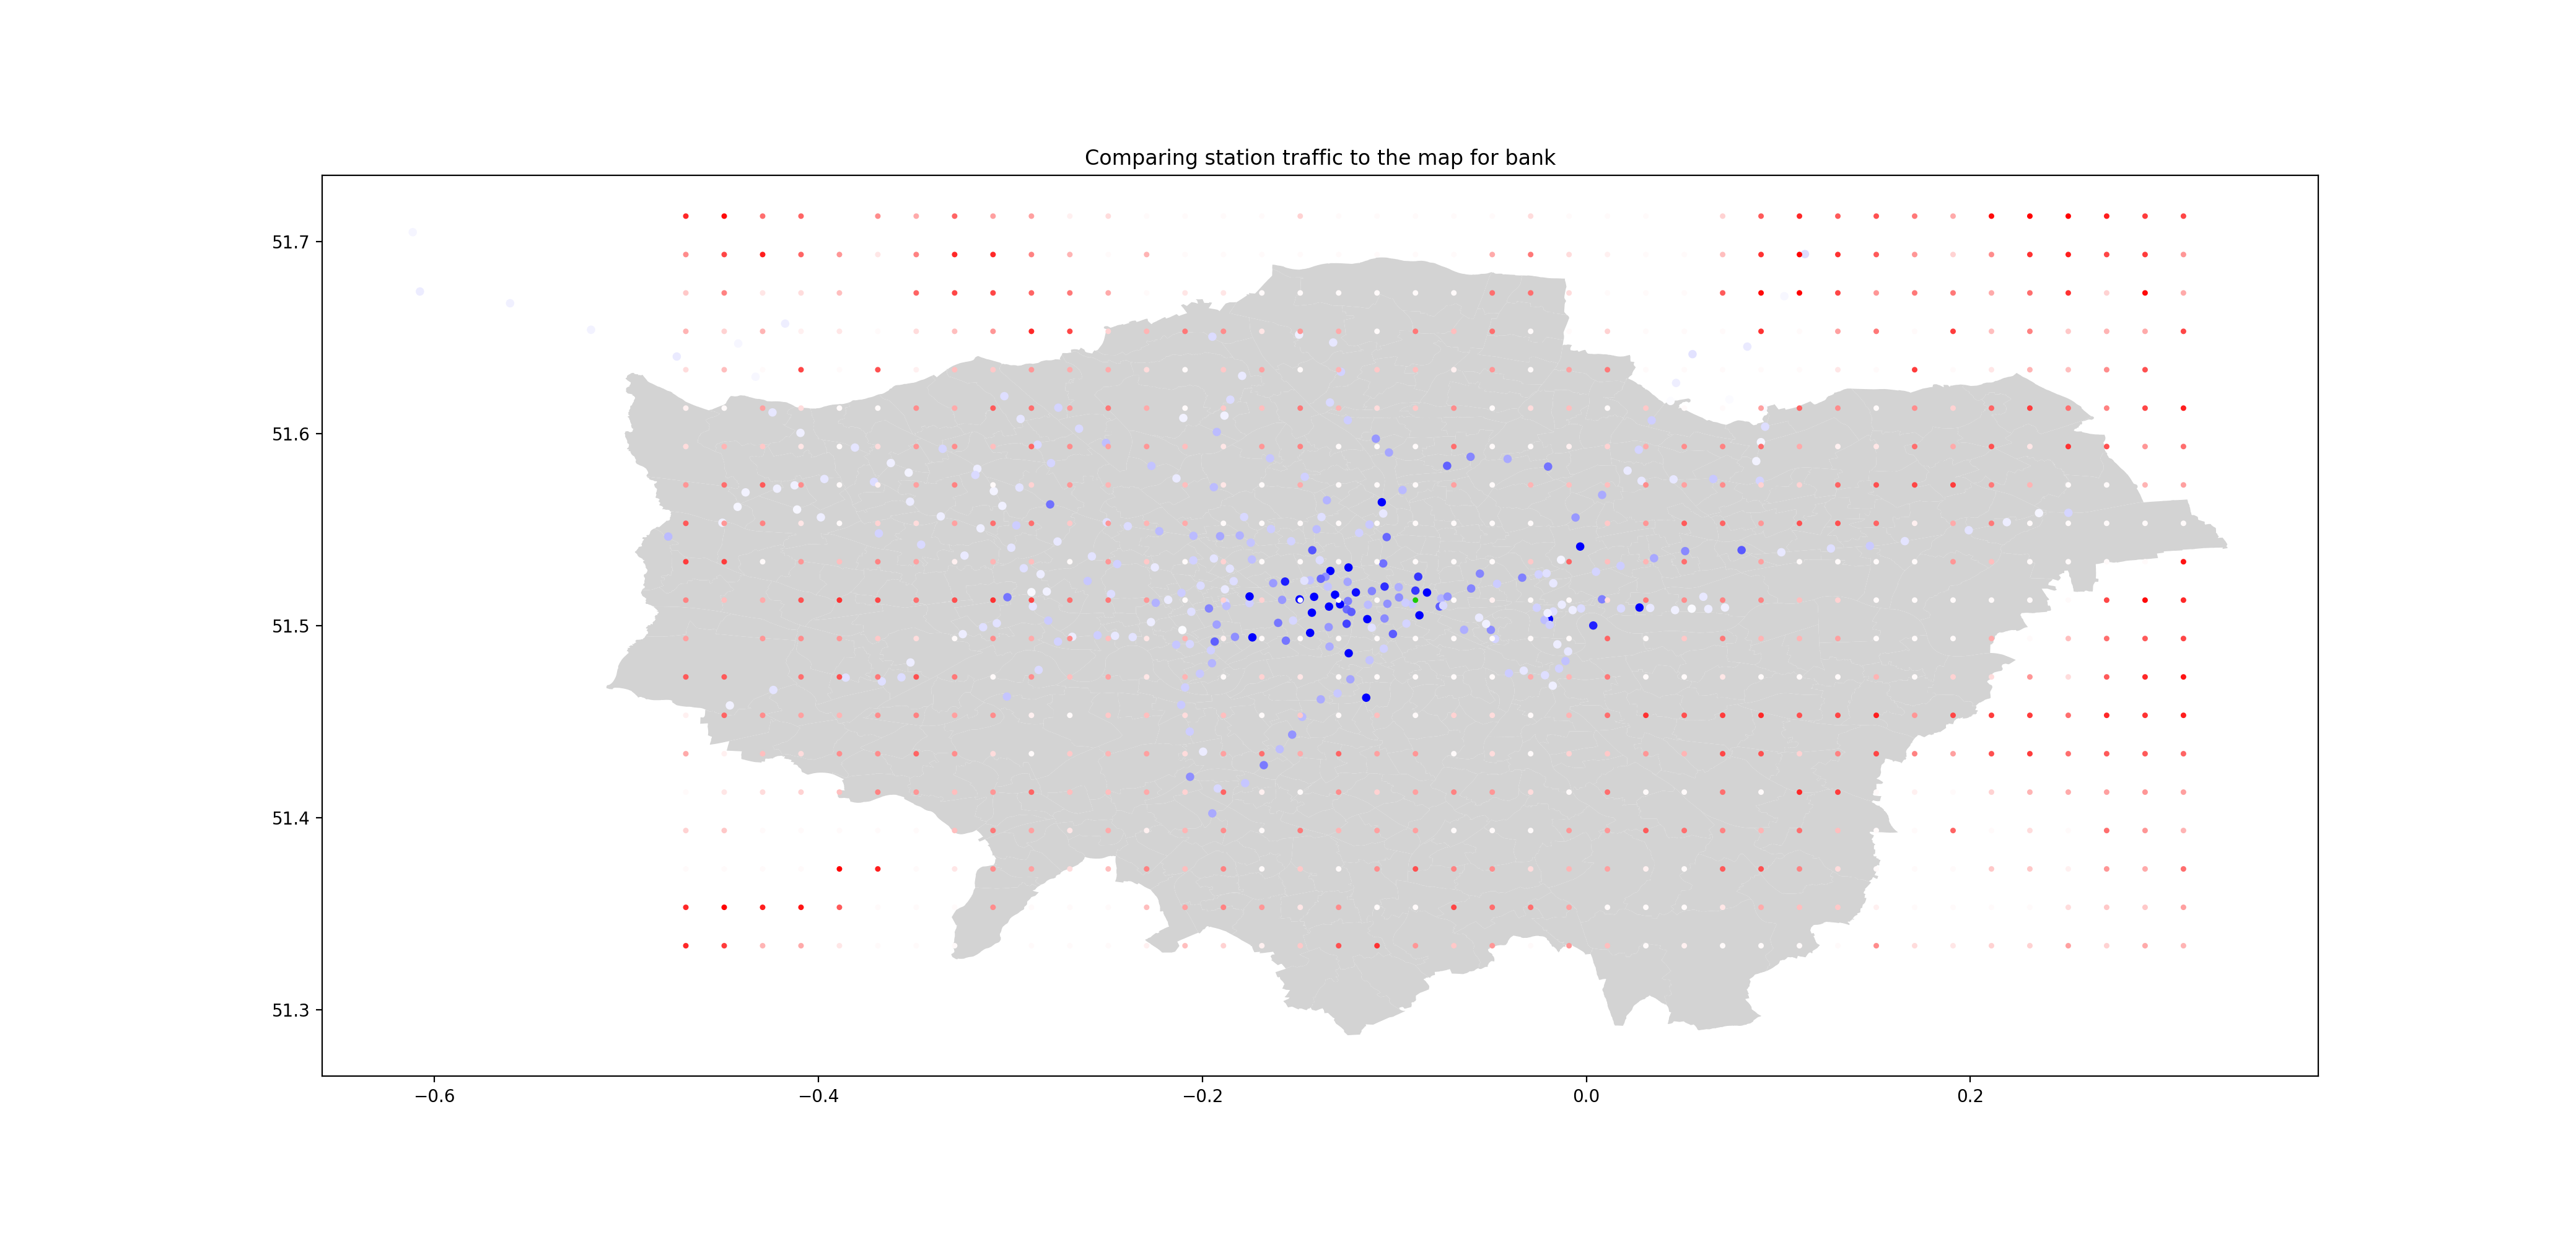

In [14]:
london_map = gpd.read_file('London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp') # Load the shapefile containing London's ward boundaries into a GeoDataFrame.
london_map['geometry']=london_map['geometry'].to_crs({'init':'epsg:4326'}) # Convert the geometries to the WGS84 coordinate system (EPSG:4326) for compatibility with GPS coordinates.

df = pd.read_csv("data/station_traffic_merged.csv", delimiter=',', skiprows=0, low_memory=False) # Load the merged station traffic data from a CSV file.
ax = london_map.plot(figsize = (20.79,10), color="lightgrey") # Plot the base map of London with wards colored in light grey.
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])] # Convert the station locations (X, Y) into Point geometries for plotting.
gdf = GeoDataFrame(df, geometry=geometry) # Create a GeoDataFrame with the station traffic data and associated geometries.
gdf['color'] = [tuple(map(float, item.split(','))) for item in df['Colors']] # Convert the 'Colors' column to RGB tuples for coloring the station points.

# Plot the stations on the map, using the calculated colors and a marker size of 15.
gdf.plot(
    ax = ax,
    markersize=15,
    color = gdf['color']
)

df_2 = pd.read_csv("data/locations.csv", delimiter=',', skiprows=0, low_memory=False)
geometry = [Point(xy) for xy in zip(df_2['latitude'], df_2['longitude'])]
gdf_2 = GeoDataFrame(df_2, geometry=geometry) # Create a GeoDataFrame with the additional location data and associated geometries.
gdf_2['color'] = [tuple(map(float, item.split(','))) for item in df_2['color']] # Convert the 'color' column to RGB tuples for coloring these additional points.

# Overlay these additional locations on the map, using a smaller marker size (5) for distinction.
gdf_2.plot(
    ax = ax,
    markersize=5,
    color = gdf_2['color']
)

ax.set_title('Comparing station traffic to the map for bank')